In [3]:
#setup
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
import scipy.stats as sstats
from sklearn import tree

from sklearn import metrics

import graphviz
from sklearn.model_selection import train_test_split

In [4]:
#load Titanic data
titanic_df = pd.read_csv('data/titanic_train.csv')
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1).dropna()
titanic_df['Sex'] = pd.Categorical(titanic_df['Sex']).codes
titanic_df['Embarked'] = pd.Categorical(titanic_df['Embarked']).codes

In [5]:
def crossvalidation(X, Y, k=10, criterion='gini', max_depth=100, min_samples_split=None, min_samples_leaf=None):
    '''
    X, Y - np.arrays
    k - # of times crossvalidating
    returns average score on testing set
    '''
    size = len(X) // k
    score = 0
    
    for i in range(k):
        test_X = X[i*size : (i+1)*size]
        test_Y = Y[i*size : (i+1)*size]
        
        train_X = np.append(X[:i*size], X[(i+1)*size:]).reshape(-1, test_X.shape[1])
        train_Y = np.append(Y[:i*size], Y[(i+1)*size:])

        if min_samples_split and min_samples_leaf:
            model = tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, 
                                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        else:
            model = tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
        
        score += t.score(test_X, test_Y)
    return score / k

## Zadanie 2.
W pakiecie SciKit do Pythona dostępnych jest kilka popularnych algorytmów klasyfikacji danych przy użyciu drzew klasyfikacyjnych. Zapoznaj się z nimi wykonując skrypt umieszczony w materiałach do wykładu. Do rysowania drzew użyj programu Graphviz.

a) Jaką miarę różnorodności stosuje algorytm konstrukcji drzew klasyfikujących użyty w skrypcie? Dla danych Titanic sporządź drzewa klasyfikacyjne stosując indeks Giniego oraz entropię.

b) Podziel dane Titanic na dane uczące i dane testowe (jak w zadaniu 1b), stwórz drzewa klasyfikacyjne na danych uczących i przetestuj na danych testowych.

c) Spróbuj ograniczyć głębokość drzewa. Zobacz jak wpływa to na wyniki (zarówno na danych uczących jak i na danych testowych).

d) Spróbuj przyciąć drzewo techniką omawianą na wykładzie lub własną. Zobacz jak wpływa to na wyniki (zarówno na danych uczących jak i na danych testowych).

e) Zrób cross validation wszystkich tworzonych w tym zadaniu klasyfikatorów na zestawie danych Titanic.

### a) Jaką miarę różnorodności stosuje algorytm konstrukcji drzew klasyfikujących użyty w skrypcie? Dla danych Titanic sporządź drzewa klasyfikacyjne stosując indeks Giniego oraz entropię.

In [6]:
def build_tree(X, Y, criterion='gini', max_depth=100, min_samples_split=None, min_samples_leaf=None):
    if min_samples_split and min_samples_leaf:
        t = tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, 
                                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    else:
        t = tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
    t.fit(X, Y)
    return t

def draw_tree(tree_, feature_names, target_names, name):
    dot_data = tree.export_graphviz(tree_, out_file=None) 
    graph = graphviz.Source(dot_data) 
    graph.render(name) 
    dot_data = tree.export_graphviz(tree_, out_file=None, 
                     feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph

In [7]:
X = titanic_df.drop(['Survived'], axis=1).dropna()
Y = titanic_df['Survived']

Score: 0.9859550561797753
Crossvalidation: 0.9859154929577464


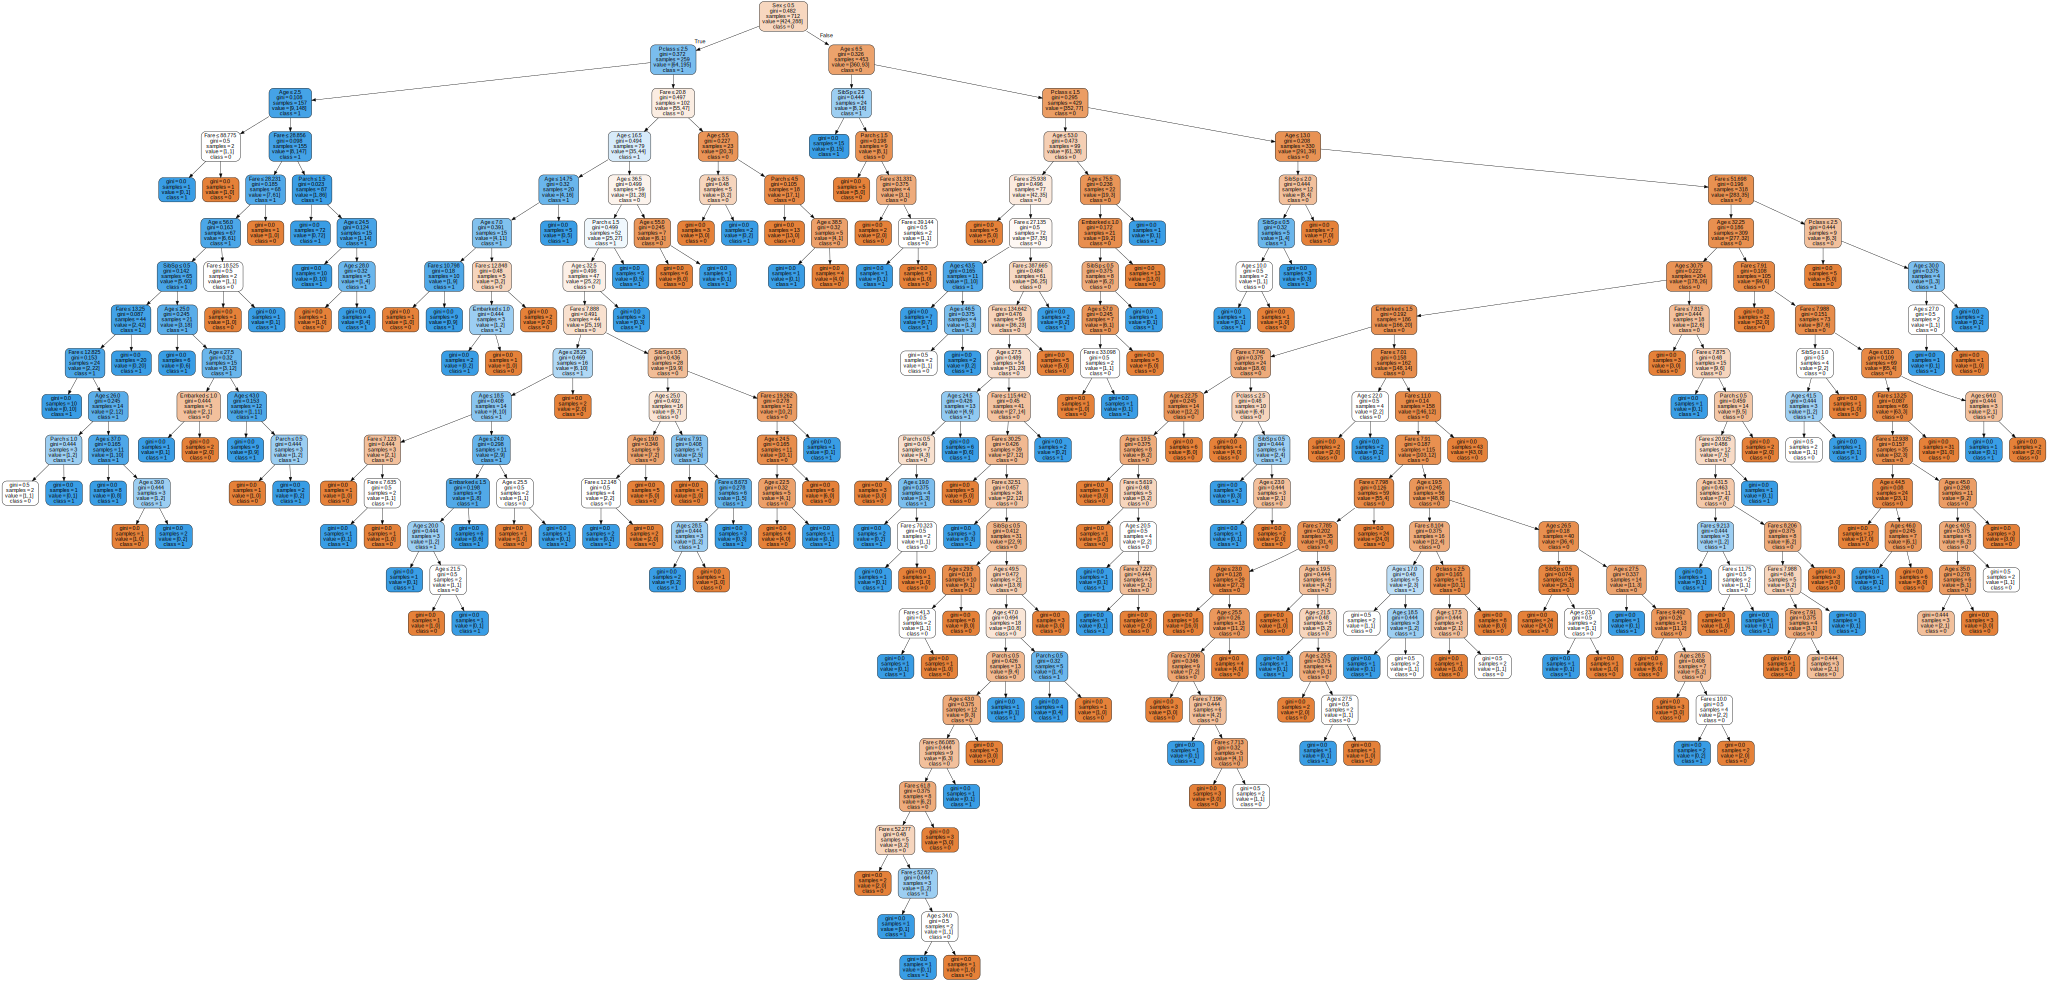

In [20]:
c = 'gini'
t = build_tree(X, Y, criterion=c)

print(f'Score: {t.score(X, Y)}')
print(f'Crossvalidation: {crossvalidation(X, Y, criterion=c)}')
draw_tree(t, X.columns, ['0', '1'], 'titanic-gini')

Score: 0.9859550561797753
Crossvalidation: 0.9859154929577464


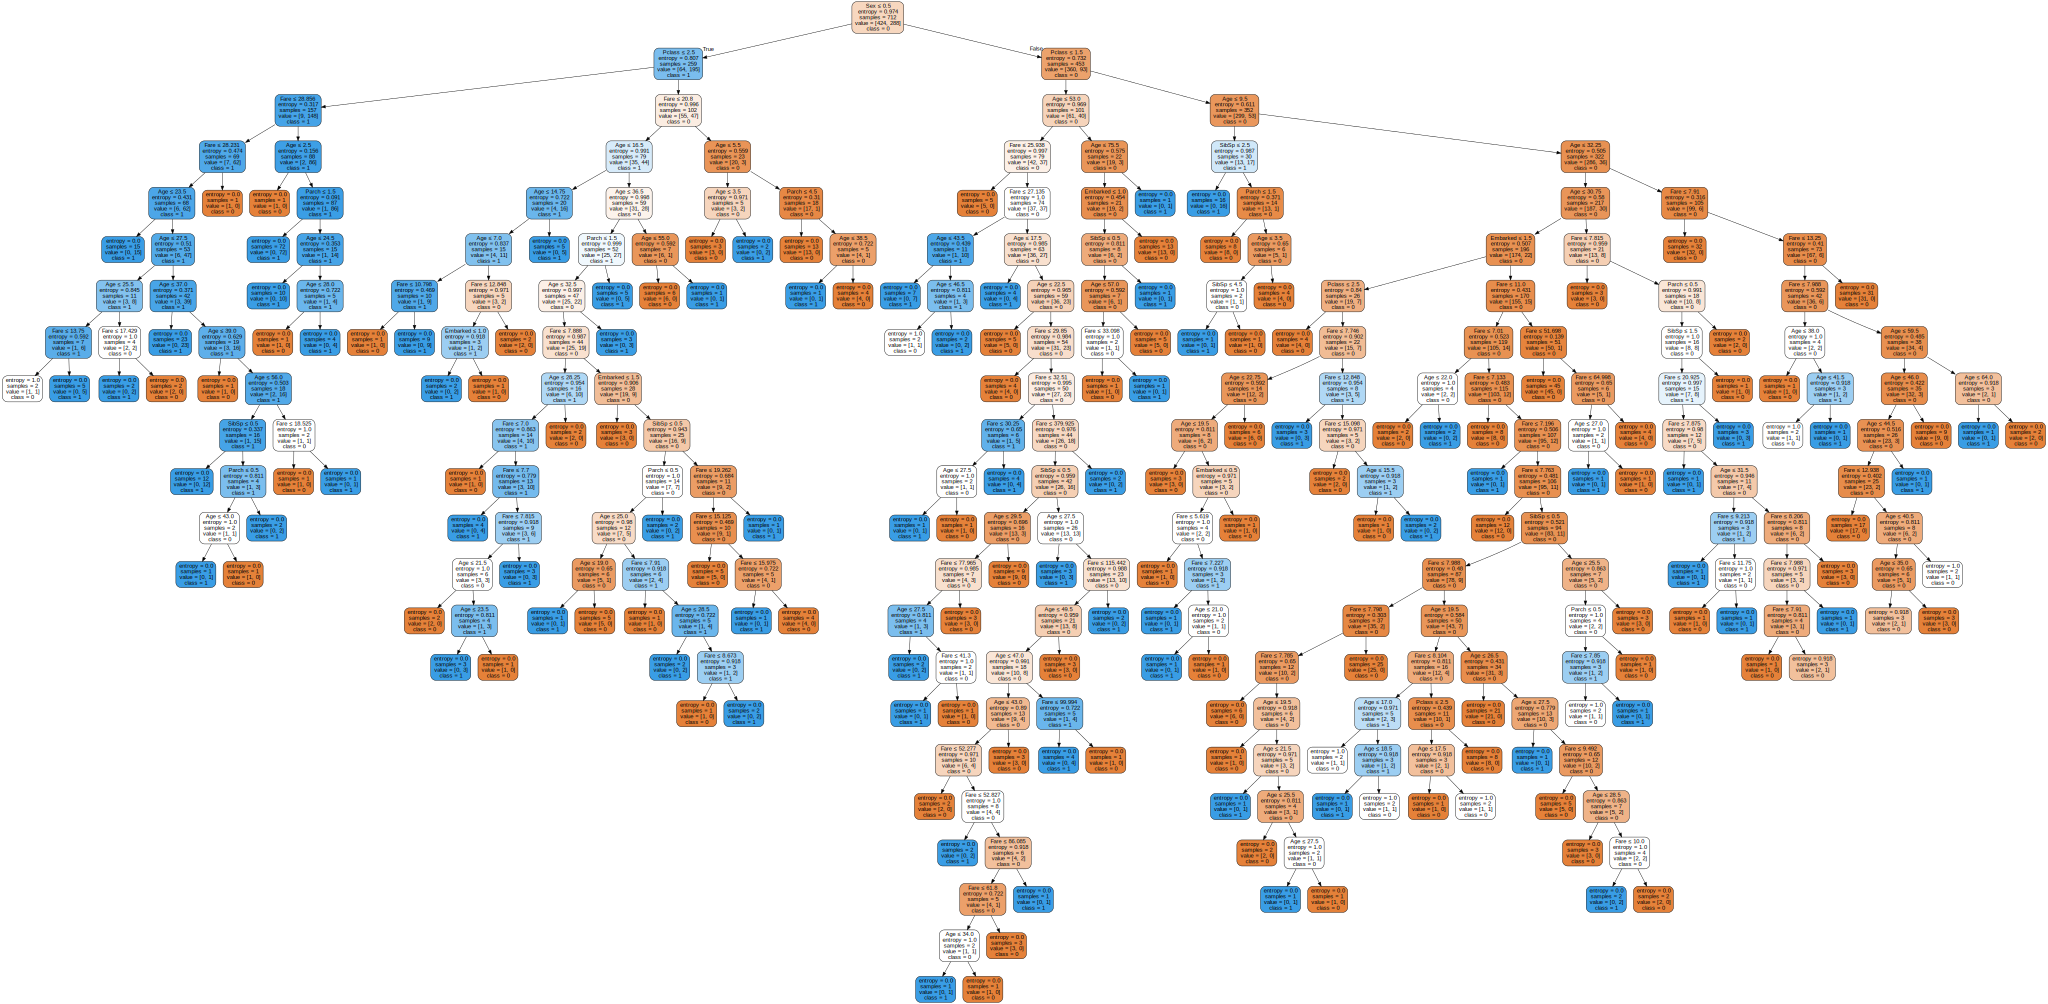

In [21]:
c = 'entropy'
t = build_tree(X, Y, criterion=c)

print(f'Score: {t.score(X, Y)}')
print(f'Crossvalidation: {crossvalidation(X, Y, criterion=c)}')
draw_tree(t, X.columns, ['0', '1'], 'titanic-entropy')

### b) Podziel dane Titanic na dane uczące i dane testowe (jak w zadaniu 1b), stwórz drzewa klasyfikacyjne na danych uczących i przetestuj na danych testowych.

In [10]:
train_df, test_df = train_test_split(titanic_df, test_size=0.3333)
train_X = train_df.drop(['Survived'], axis=1).dropna()
train_Y = train_df['Survived']
test_X = test_df.drop(['Survived'], axis=1).dropna()
test_Y = test_df['Survived']

In [22]:
c = 'gini'
t = build_tree(train_X, train_Y, criterion=c)

pred = t.predict(test_X)
conf = metrics.confusion_matrix(pred, test_Y)

print(f'Score of training set: {t.score(train_X, train_Y)}')
print(f'Score of training set: {t.score(test_X, test_Y)}')
print(f'Crossvalidation: {crossvalidation(X, Y, criterion=c)}')
print('Confussion martix', conf)

Score of training set: 0.9978902953586498
Score of training set: 0.773109243697479
Crossvalidation: 0.9225352112676056
Confussion martix [[113  30]
 [ 24  71]]


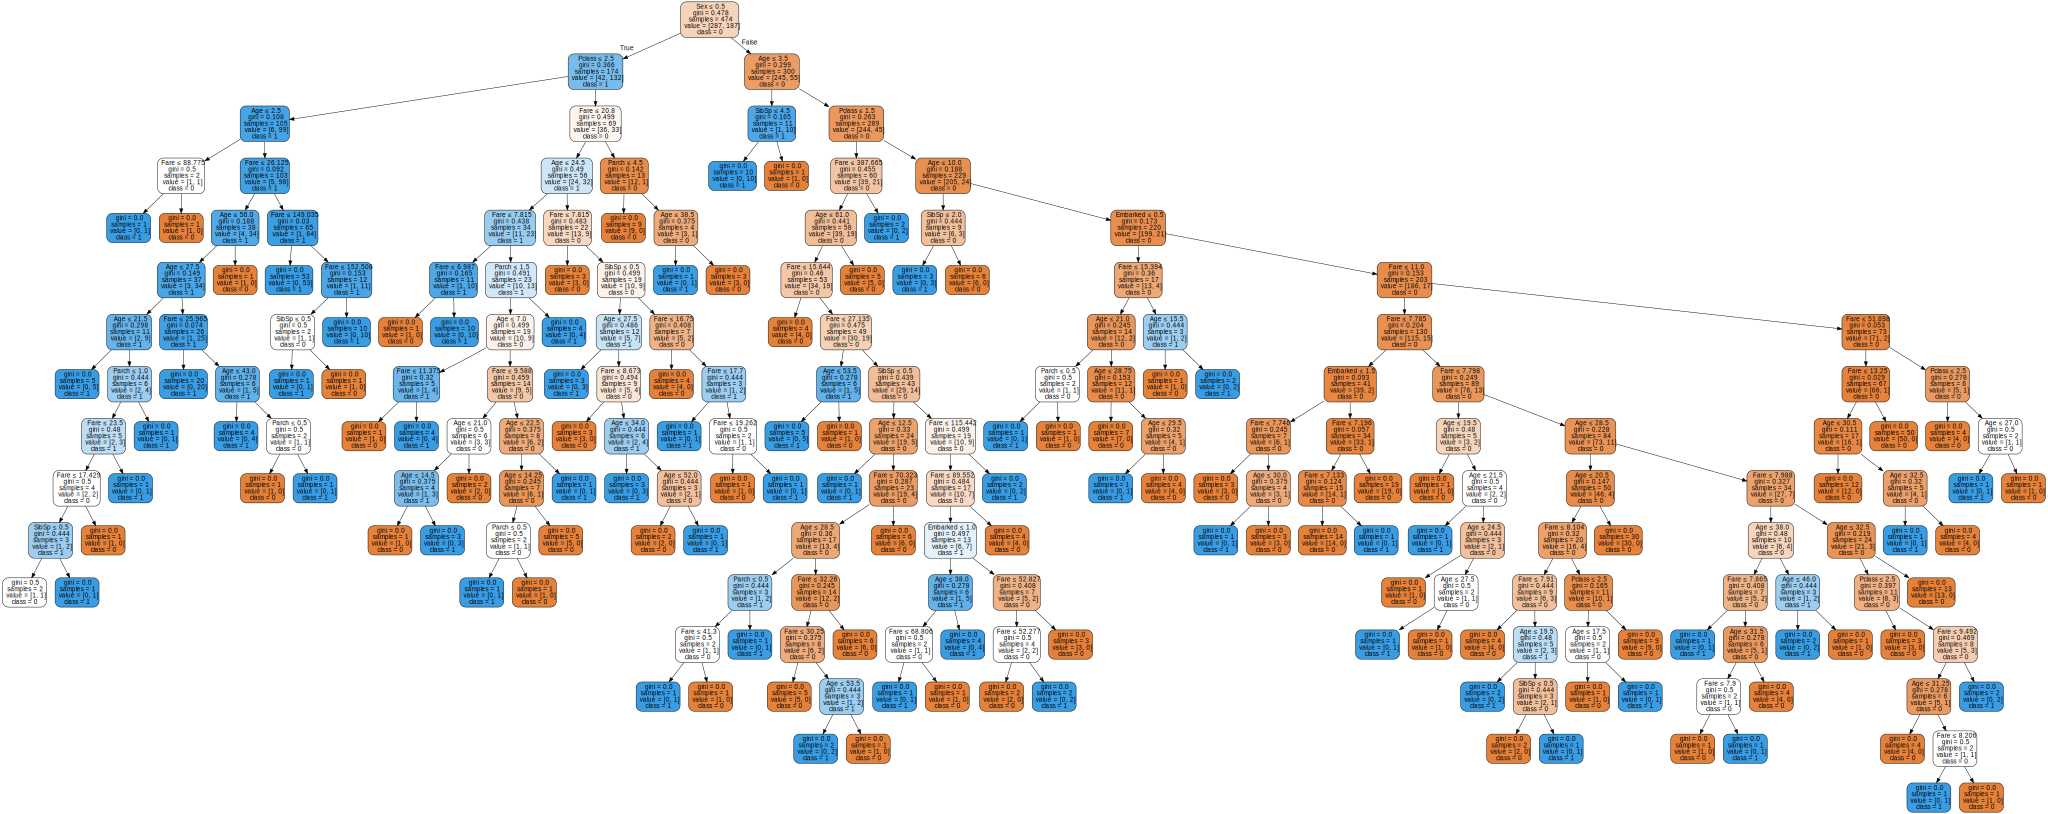

In [23]:
draw_tree(t, train_X.columns, ['0', '1'], 'titanic-gini')

In [12]:
c = 'entropy'
t = build_tree(train_X, train_Y, criterion=c)

pred = t.predict(test_X)
conf = metrics.confusion_matrix(pred, test_Y)

print(f'Score of training set: {t.score(train_X, train_Y)}')
print(f'Score of training set: {t.score(test_X, test_Y)}')
print(f'Crossvalidation: {crossvalidation(X, Y, criterion=c)}')
print('Confussion martix', conf)

Score of training set: 0.9978902953586498
Score of training set: 0.7983193277310925
Crossvalidation: 0.932394366197183
Confussion martix [[115  26]
 [ 22  75]]


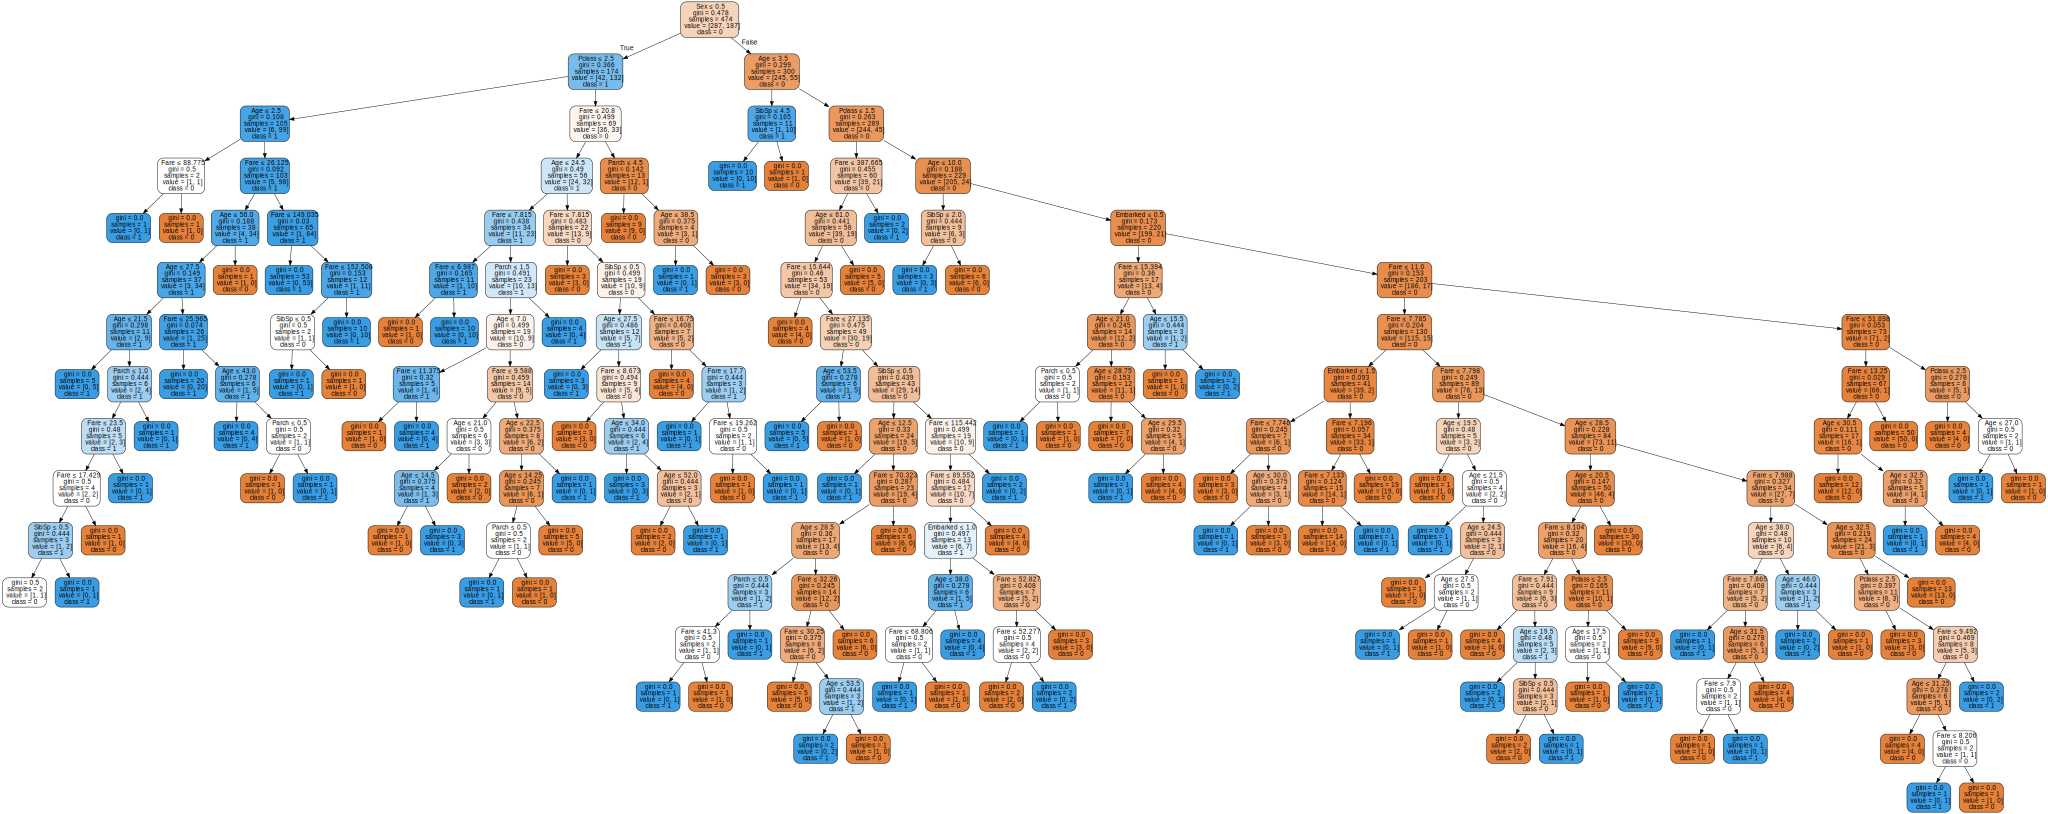

In [24]:
draw_tree(t, train_X.columns, ['0', '1'], 'titanic-gini')

### c) Spróbuj ograniczyć głębokość drzewa. Zobacz jak wpływa to na wyniki (zarówno na danych uczących jak i na danych testowych).

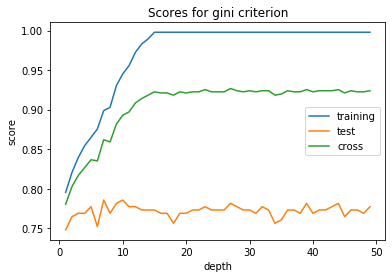

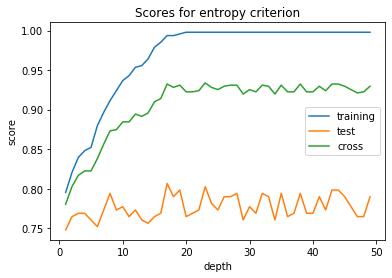

In [13]:
MAX_DEPTHS = np.arange(1, 50)
score_tra = np.zeros(len(MAX_DEPTHS))
score_tes = np.zeros(len(MAX_DEPTHS))
score_cross = np.zeros(len(MAX_DEPTHS))
CRITERIONS = ['gini', 'entropy']

for criterion in CRITERIONS:
    for i, md in enumerate(MAX_DEPTHS):
        t = build_tree(train_X, train_Y, criterion=criterion, max_depth=md)
        score_tra[i] = t.score(train_X, train_Y)
        score_tes[i] = t.score(test_X, test_Y)
        score_cross[i] = crossvalidation(X, Y, max_depth=md)

    plt.figure()
    plt.xlabel('depth')
    plt.ylabel('score')
    plt.title(f'Scores for {criterion} criterion')
    plt.plot(MAX_DEPTHS, score_tra, label='training')
    plt.plot(MAX_DEPTHS, score_tes, label='test')
    plt.plot(MAX_DEPTHS, score_cross, label='cross')
    plt.legend(loc='right')

### d) Spróbuj przyciąć drzewo techniką omawianą na wykładzie lub własną. Zobacz jak wpływa to na wyniki (zarówno na danych uczących jak i na danych testowych).

In [18]:
gini_tree = build_tree(train_X, train_Y, criterion='gini', max_depth=5, min_samples_split=10, min_samples_leaf=10)
entropy_tree = build_tree(train_X, train_Y, criterion='entropy', max_depth=5, min_samples_split=10, min_samples_leaf=10)

print(crossvalidation(X, Y, criterion='entropy', max_depth=5, min_samples_split=10, min_samples_leaf=10))
print(crossvalidation(X, Y, criterion='gini', max_depth=5, min_samples_split=10, min_samples_leaf=10))

0.9295774647887323
0.9295774647887323


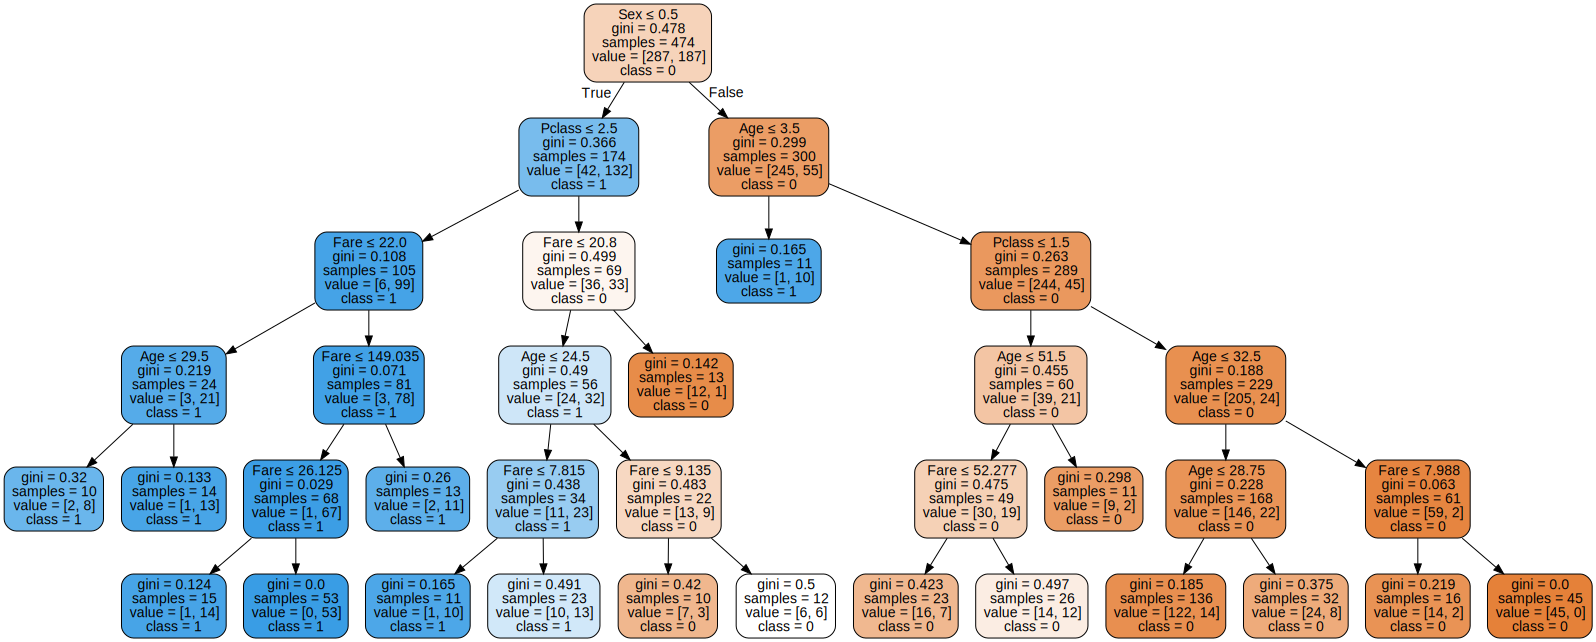

In [25]:
draw_tree(gini_tree, train_X.columns, ['0', '1'], 'titanic-gini-prunned')

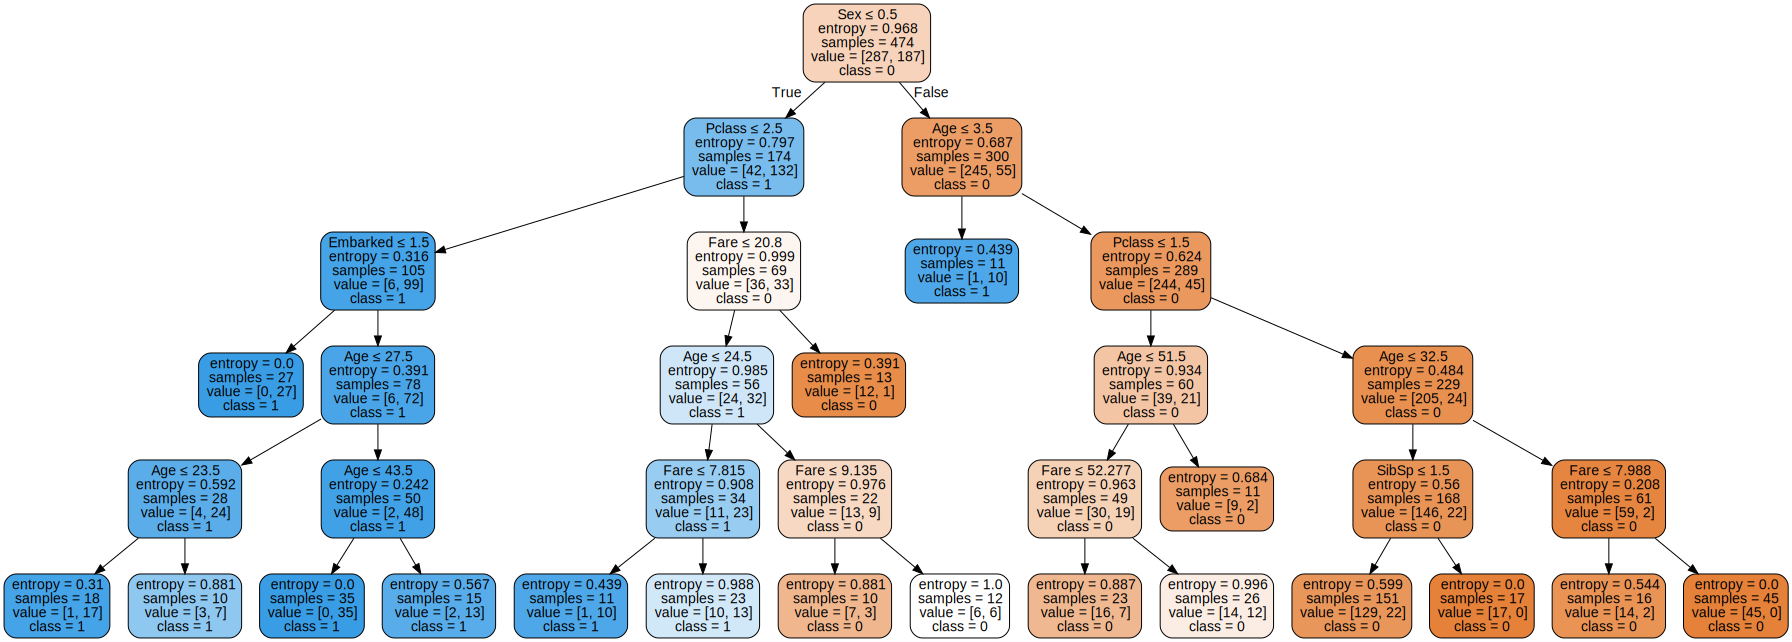

In [27]:
draw_tree(entropy_tree, train_X.columns, ['0', '1'], 'titanic-entropy-prunned')